# 03. PyTorch Computer Vision


**`segmentaion` read about this**

might handy for the project

## 1. Computer vision libaries in PyTorch

* [`torchvision`](https://www.learnpytorch.io/03_pytorch_computer_vision/) - base domain library for PyTorch computer vision
* `torchvision.datasets` - get datasets and data loading functions for computer vision here
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with an ML model
* `torch.utils.data.Dataset` - Base dataset class for PyTorch.
* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset

In [2]:
import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# import matplotlib
import matplotlib.pyplot as plt

#check version
print(torch.__version__)
print(torchvision.__version__)

2.4.0+cu124
0.19.0+cu124


## 1. Getting a dataset

The dataset we'll be using in FashinMNIST from torchvision.datasets


In [3]:
# setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(root = "data",
                                   train = True,
                                   download=True,
                                   transform = torchvision.transforms.ToTensor(),
                                   target_transform = None)
test_data = datasets.FashionMNIST(root = "data",
                                  train = False,
                                  download = True,
                                  transform=ToTensor(),
                                  target_transform= None)

In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
train_data[0][0].shape

torch.Size([1, 28, 28])

In [6]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [7]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [8]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [9]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [10]:
image.shape, label

(torch.Size([1, 28, 28]), 9)

In [11]:
# Check the shape of our image
print(f"Image shape: {image.shape} -> [color_channels, height, width]") 
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


### 1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


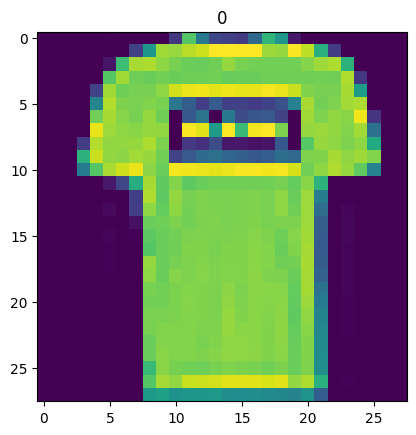

In [12]:
import matplotlib.pyplot as plt
image, label = train_data[1]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label);
# image

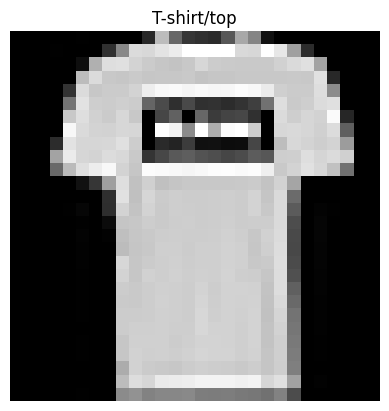

In [13]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);
plt.axis(False);

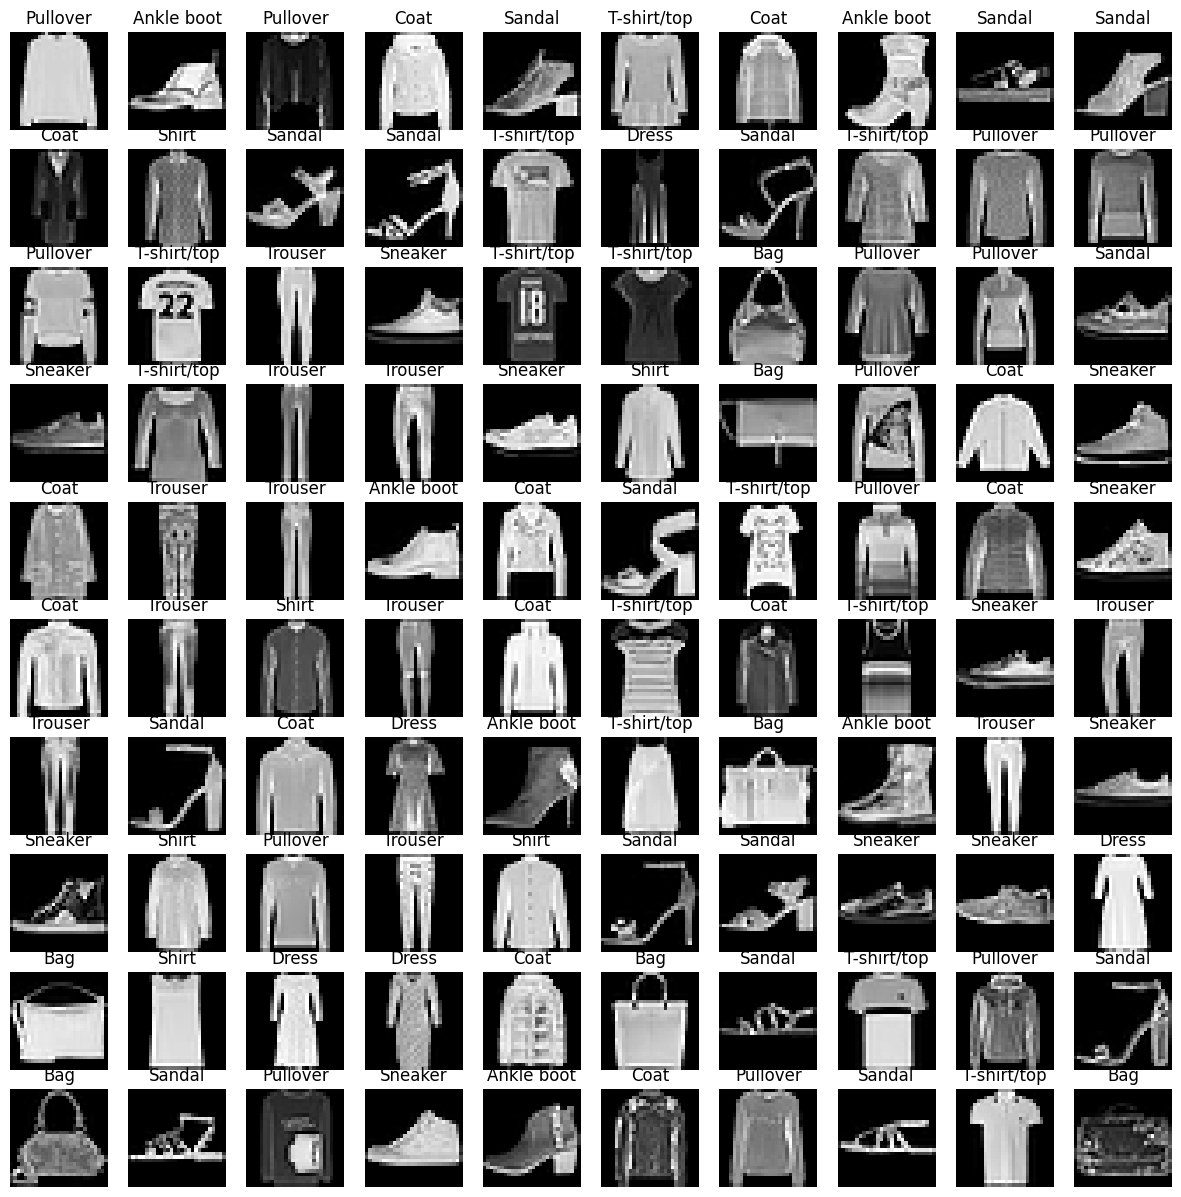

In [14]:
# Plot more images
# torch.manual_seed(42)
fig = plt.figure(figsize=(15,15))
rows, cols = 10, 10
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False);

## 2. prepare DataLoader
 Right Now, our data is in the form of pytorch

**`DataLoader turn our datasets into a pytorch iterable.`**

the point is 
**`We want to turn our data into batches (or mini-Batches).`**

the reasons!

1. it is more computationally efficient , as in , our computing hardware may not be able to look (store in memory) at 60000 images in one hit. so we breake it down to any batches like 32 , 18 or anything which help the model train in the device in bettter form

2. It gives our neural network more chance to upadte its gradients per epoch.


 

In [15]:
from torch.utils.data import DataLoader

# Setup the batch size
Batch_size = 32

# Turns datasets into iterables(Batches)
train_dataloader = DataLoader(dataset = train_data,
                              batch_size = Batch_size,
                              shuffle = True)
test_dataloader = DataLoader(dataset = test_data,
                             batch_size = Batch_size,
                             shuffle = False)

train_dataloader, test_dataloader


(<torch.utils.data.dataloader.DataLoader at 0x26140421700>,
 <torch.utils.data.dataloader.DataLoader at 0x2613f3036e0>)

In [16]:
# lets's check out whats we've created 
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} betcehs of {Batch_size}")
print(f"Length of test_dataloader:{len(test_dataloader)} betches of {Batch_size}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x0000026140421700>, <torch.utils.data.dataloader.DataLoader object at 0x000002613F3036E0>)
Length of train_dataloader: 1875 betcehs of 32
Length of test_dataloader:313 betches of 32


In [17]:
# Checks out whats inside our training dataloader
train_features_batch , train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 2, label size: torch.Size([])


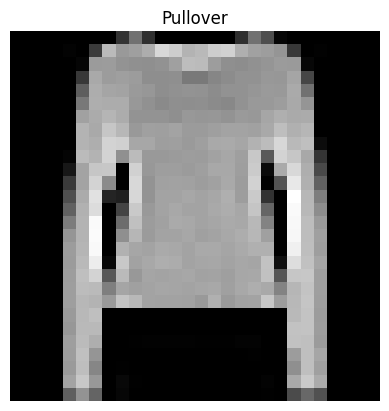

In [18]:
# Show a sample
# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: Build a Basline model




In [19]:
# create a flatten Layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print ou twhat happened
print(f"shape before flattening: {x.shape}")
print(f"shape after flattening: {output.shape}")

shape before flattening: torch.Size([1, 28, 28])
shape after flattening: torch.Size([1, 784])


{x.shape} -> [color_channels, height, width]"

{output.shape} -> [color_channels, height `*`width]"

In [20]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_unit: int,
                 output_shapes: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_unit),
            nn.Linear(in_features = hidden_unit,
                      out_features = output_shapes)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [21]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [22]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape = 28*28, 
    hidden_unit = 10, #how many units in the hidden layer
    output_shapes = len(class_names) # one for every class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

* **Summary**

* **`Purpose`** : Flatten is used to convert multi-dimensional tensors into a flat, 1-dimensional tensor.
Common 

* **`Usage`**: It is often used between convolutional layers and fully connected layers in neural networks.

* **`PyTorch Implementation`**: You can use nn.Flatten() as a layer or torch.flatten() as a function.
This operation is essential in neural networks for transitioning from convolutional to fully connected layers.

import torch.nn as nn

class SimpleCNN(nn.Module):
     def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(16 * 28 * 28, 10)  #
        
        Fully connected layer

    def forward(self, x):
        x = self.conv1(x)
        x = self.flatten(x)  # Flatten the output
        x = self.fc1(x)  # Pass it through the fully connected layer
        return x

##### Instantiate the model and print
model = SimpleCNN()
print(model)


In [23]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [24]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss function - since we're working with multi-class data, our loss function will be `nn.CrossEntropyLoss()`
* Optimizer - our optimizer `torch.optim.SGD()` (stochastic gradient descent)
* Evaluation metric - since we're working on a classification problem, let's use accruacy as our evaluation metric

In [25]:
import requests
from pathlib import Path

#downlaod help functionfrom learn Pytorhc repo

if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    print("downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py"):
        f.write(request.content)

helper_functions.py already exists, skipping download


In [26]:
from helper_functions import accuracy_fn

# setup loss functon and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(), lr= 0.1)

### 3.2 Creating a function to time our experiments

Machine learning is very experimental.

Two of the main things you'll often want to track are:
1. Model's performance (loss and accuracy values etc)
2. How fast it runs 


In [27]:
from timeit import default_timer as Timer
def print_train_timer(start: float, end: float, device: torch.device = None):
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [28]:
start_time = Timer()

end_time = Timer()
print_train_timer(start = start_time, end = end_time, device = "gpu")

Train time on gpu: 0.000 seconds


1.539999993838137e-05

### 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*.
4. Print out what's happening.
5. Time it all.

**Note:** Because we are computing on *batches*, the optimizer will update the model's parameters once *per batch* rather than once per epoch.

In [30]:
# import Tqdm for progress bar
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = Timer()

# set the epoch numbers of epochs
epochs = 10

# create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")

    ## training 
    train_loss = 0

    # Add a loop to loop through the training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()

        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss = loss + train_loss # accumulate train loss

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. loss backpropagation
        loss.backward()

        # 5. Optimizer step
        optimizer.step()


        # print out what's happening
        if batch % 400 == 0:
            print(f"Look at {batch} / {len(train_dataloader.dataset)} samples.")
    # divice total train loss by length of train dataloader
    train_loss/= len(train_dataloader)

    ## testing
    test_loss, test_acc =0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X_test)

            # 2. Calculate loss
            test_loss += loss_fn(test_pred, y_test)

            # 3. Calculate accuracy
            test_acc += accuracy_fn(y_true= y_test,
                                    y_pred = test_pred.argmax(dim=1))

        # Calculate the test loss average per batch
        test_loss/=len(test_dataloader)

        # Calculate the test accuracy average per batch
        test_acc /=len(test_dataloader)

    # Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

# calculate training time
train_time_end_on_cpu = Timer()
total_train_time_model_0 = print_train_timer(start = train_time_start_on_cpu, end = train_time_end_on_cpu, device = None)       




C:\Users\vivek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
---------
Look at 0 / 60000 samples.
Look at 400 / 60000 samples.
Look at 800 / 60000 samples.
Look at 1200 / 60000 samples.
Look at 1600 / 60000 samples.


 10%|█         | 1/10 [00:03<00:32,  3.60s/it]


Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%
Epoch: 1
---------
Look at 0 / 60000 samples.
Look at 400 / 60000 samples.
Look at 800 / 60000 samples.
Look at 1200 / 60000 samples.
Look at 1600 / 60000 samples.


 20%|██        | 2/10 [00:07<00:27,  3.49s/it]


Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%
Epoch: 2
---------
Look at 0 / 60000 samples.
Look at 400 / 60000 samples.
Look at 800 / 60000 samples.
Look at 1200 / 60000 samples.
Look at 1600 / 60000 samples.


 30%|███       | 3/10 [00:10<00:24,  3.57s/it]


Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%
Epoch: 3
---------
Look at 0 / 60000 samples.
Look at 400 / 60000 samples.
Look at 800 / 60000 samples.
Look at 1200 / 60000 samples.
Look at 1600 / 60000 samples.


 40%|████      | 4/10 [00:14<00:21,  3.63s/it]


Train loss: 0.44251 | Test loss: 0.46306, Test acc: 83.75%
Epoch: 4
---------
Look at 0 / 60000 samples.
Look at 400 / 60000 samples.
Look at 800 / 60000 samples.
Look at 1200 / 60000 samples.
Look at 1600 / 60000 samples.


 50%|█████     | 5/10 [00:18<00:18,  3.63s/it]


Train loss: 0.43582 | Test loss: 0.46869, Test acc: 83.27%
Epoch: 5
---------
Look at 0 / 60000 samples.
Look at 400 / 60000 samples.
Look at 800 / 60000 samples.
Look at 1200 / 60000 samples.
Look at 1600 / 60000 samples.


 60%|██████    | 6/10 [00:21<00:14,  3.62s/it]


Train loss: 0.42915 | Test loss: 0.45892, Test acc: 83.64%
Epoch: 6
---------
Look at 0 / 60000 samples.
Look at 400 / 60000 samples.
Look at 800 / 60000 samples.
Look at 1200 / 60000 samples.
Look at 1600 / 60000 samples.


 70%|███████   | 7/10 [00:25<00:10,  3.64s/it]


Train loss: 0.42475 | Test loss: 0.48769, Test acc: 83.32%
Epoch: 7
---------
Look at 0 / 60000 samples.
Look at 400 / 60000 samples.
Look at 800 / 60000 samples.
Look at 1200 / 60000 samples.
Look at 1600 / 60000 samples.


 80%|████████  | 8/10 [00:28<00:07,  3.64s/it]


Train loss: 0.42265 | Test loss: 0.47223, Test acc: 83.38%
Epoch: 8
---------
Look at 0 / 60000 samples.
Look at 400 / 60000 samples.
Look at 800 / 60000 samples.
Look at 1200 / 60000 samples.
Look at 1600 / 60000 samples.


 90%|█████████ | 9/10 [00:32<00:03,  3.65s/it]


Train loss: 0.42032 | Test loss: 0.47133, Test acc: 83.46%
Epoch: 9
---------
Look at 0 / 60000 samples.
Look at 400 / 60000 samples.
Look at 800 / 60000 samples.
Look at 1200 / 60000 samples.
Look at 1600 / 60000 samples.


100%|██████████| 10/10 [00:36<00:00,  3.62s/it]


Train loss: 0.41754 | Test loss: 0.46280, Test acc: 83.65%
Train time on None: 36.238 seconds



## 4. Make predictions and get Model 0 results


In [31]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader.""" 

    loss, acc= 0,0 
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            y_pred = model(X)

            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, 
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred probs -> pred labels)

        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works if model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}
#Calculate model 0 results
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn, 
                             accuracy_fn=accuracy_fn)
model_0_results

100%|██████████| 313/313 [00:00<00:00, 829.66it/s]


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.46279820799827576,
 'model_acc': 83.64616613418531}

# 6. Model 1: Building a better model with non-linearity 